# MNIST Neural Network

### Imports

In [1]:
import tensorflow as tf
import numpy as np
import math

### Load Data and Create Model

In [2]:
mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)


#print(np.shape([1,2,3,4]))

#print(np.shape(x_train)) #(60000,28,28)

#feed forward NN

hidden_units = 200

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(hidden_units,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

#could try sparse
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=[tf.keras.metrics.RootMeanSquaredError()])

steps_per_epoch = len(x_train)//100
print(y_test[0])

Metal device set to: Apple M2
7


2022-07-26 14:23:21.399476: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-26 14:23:21.399564: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)

#print(np.shape([1,2,3,4]))

#print(np.shape(x_train)) #(60000,28,28)

#feed forward NN

hidden_units = 200

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(hidden_units,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

#could try sparse
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

steps_per_epoch = len(x_train)//100

#### Decaying Learning Rate Function

In [8]:
# lr schedule callback
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * math.pow(0.6,epoch), verbose=True)


In [4]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Train

In [9]:
#tf.keras.models.Sequential().fit()
print(y_train)
print(np.shape(y_train))
model.fit(x_train,y_train,epochs=10,steps_per_epoch = steps_per_epoch)#callbacks=[lr_decay_callback])

[5 0 4 ... 5 6 8]
(60000,)
Epoch 1/10
 28/600 [>.............................] - ETA: 2s - loss: 0.7812 - accuracy: 0.7614

2022-07-26 14:24:13.124644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 2s 4ms/step - loss: 0.2188 - accuracy: 0.9346
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1028 - accuracy: 0.9685
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0738 - accuracy: 0.9772
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0593 - accuracy: 0.9812
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0526 - accuracy: 0.9838
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0461 - accuracy: 0.9854
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0473 - accuracy: 0.9859
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0389 - accuracy: 0.9880
Epoch 9/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0361 - accuracy: 0.9893
Epoch 10/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0319 - accuracy: 0.9902


In [7]:
# print model layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (100, 784)                0         
                                                                 
 dense_2 (Dense)             (100, 200)                157000    
                                                                 
 dense_3 (Dense)             (100, 10)                 2010      
                                                                 
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


### Evaluate Loss and Accuracy on Test Set

In [10]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print("loss: ",val_loss,"\n","accuracy: ",val_acc)

 49/313 [===>..........................] - ETA: 0s - loss: 0.2586 - accuracy: 0.9585 

2022-07-26 14:24:42.187530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.1771 - accuracy: 0.9690
loss:  0.17711737751960754 
 accuracy:  0.9690000414848328


In [11]:
model.save('num_model')

INFO:tensorflow:Assets written to: num_model/assets


In [10]:
new_model = tf.keras.models.load_model('num_model')

In [12]:
print(np.shape(x_test))
predictions = new_model.predict([x_test])

(10000, 28, 28)


NameError: name 'new_model' is not defined

In [12]:
print(len(x_test))

10000


In [13]:
for i in range(len(predictions)):
    if np.argmax(predictions[i])!=y_test[i]:
        print(np.argmax(predictions[i]))
        plt.imshow(x_test[i],cmap=plt.cm.binary)
        break

9


NameError: name 'plt' is not defined

In [16]:
print(predictions[9876])

[1.2930743e-20 1.0000000e+00 1.4422655e-20 3.5164758e-22 5.2656620e-14
 2.0460422e-15 4.8591104e-17 1.4452675e-13 2.6751034e-14 2.0754780e-25]


In [15]:
plt.imshow(x_test[9876],cmap=plt.cm.binary)

NameError: name 'plt' is not defined

In [1]:
from NN_database import Database
import pandas as pd
db = Database()

connection = db.create_db_connection("140.233.160.216", "agironda", "phys_research1", "mnist_db")

select_all_query = "SELECT * FROM mnist"

results = db.read_query(connection,select_all_query)

from_db = []

for result in results:
  result = list(result)
  from_db.append(result)

columns = ["nn_id", "hidden_units", "layers", "training_size", "learning_rate",
            "decay_lr","dropout","dropout_size","epochs","batch_size","loss",
            "metrics","activation","convolutional","accuracy"]

df = pd.DataFrame(from_db, columns=columns)
df = df[df["layers"]==3]

display(df)

ModuleNotFoundError: No module named 'mysql'

In [18]:
import matplotlib.pyplot as plt
x_var = "hidden_units"
plt.scatter(df[x_var],df["accuracy"])
plt.xlabel(x_var)
plt.ylabel("accuracy")
plt.show()

NameError: name 'df' is not defined

In [ ]:
# lr schedule callback
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * math.pow(0.6,epoch), verbose=True)


mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(kernel_size=3,filters=12,use_bias=False,padding='same'))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Conv2D(kernel_size=6,filters=24,use_bias=False,padding='same',strides=2))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Conv2D(kernel_size=6,filters=32,use_bias=False,padding='same',strides=2))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(200,use_bias=False))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

steps_per_epoch = len(x_train)//64

model.fit(x_train,y_train,epochs=10,steps_per_epoch = steps_per_epoch,callbacks=[lr_decay_callback])

In [13]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1771 - accuracy: 0.9690
0.9690000414848328


In [14]:
model.save('num_model')

INFO:tensorflow:Assets written to: num_model/assets


In [15]:
new_model = tf.keras.models.load_model('num_model')

In [16]:
predictions = new_model.predict([x_test])

120/313 [==========>...................] - ETA: 0s

2022-07-26 14:25:04.408678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


2


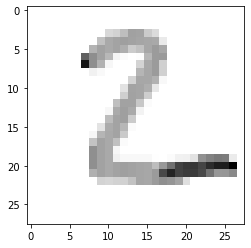

In [22]:
print(np.argmax(predictions[1]))
plt.imshow(x_test[1],cmap=plt.cm.binary)